<a href="https://colab.research.google.com/github/apoorvapu/data_science/blob/main/time-series.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Time-series forecasting: ARIMA (AutoRegressive Integrated Moving Average), SARIMA (seasonal), Temporal Fusion Transformer (TFT)


AR (Autoregression): dependent relationship between an observation and its preceding or ‘lagged’ observations. Autocorrelation is the measure of the degree of similarity between a given time series and the lagged version of that time series over successive time periods.
    
I (Integrated): To achieve a stationary time series, one that doesn’t exhibit trend or seasonality, differencing is applied. It typically involves subtracting an observation from its preceding observation.

MA (Moving Average): This component zeroes in on the relationship between an observation and the residual error from a moving average model based on lagged observations.

https://www.kaggle.com/code/harshjain123/time-series-arima-sarima

https://medium.com/@ozdogar/time-series-forecasting-using-sarima-python-8db28f1d8cfc

https://www.geeksforgeeks.org/sarima-seasonal-autoregressive-integrated-moving-average/

https://en.wikipedia.org/wiki/Autoregressive_integrated_moving_average


ARIMA

    it supports both an autoregressive and moving average elements. The integrated element refers to differencing allowing the method to support time series data with a trend.

    A problem with ARIMA is that it does not support seasonal data. That is a time series with a repeating cycle.

    ARIMA expects data that is either not seasonal or has the seasonal component removed, e.g. seasonally adjusted via methods such as seasonal differencing.

SARIMA

    It adds three new hyperparameters to specify the autoregression (AR), differencing (I) and moving average (MA) for the seasonal component of the series, as well as an additional parameter for the period of the seasonality.

    A seasonal ARIMA model is formed by including additional seasonal terms in the ARIMA.

    The seasonal part of the model consists of terms that are very similar to the non-seasonal components of the model, but they involve backshifts of the seasonal period.

The general process for ARIMA models is the following:

    Visualize the Time Series Data
    Make the time series data stationary
    Plot the Correlation and AutoCorrelation Charts
    Construct the ARIMA Model or Seasonal ARIMA based on the data
    Use the model to make prediction



Lags in Time Series Forecasting:
Definition:
A lag is a time delay or offset in a time series, representing a past value of a variable used to predict its future values.
Example:
If you're forecasting sales, a lag of 1 might mean using last month's sales to predict this month's sales.
Purpose:
Lags help capture the relationships between past and future values of a variable, which can be crucial for accurate forecasting.

ARIMA, SARIMA, and Temporal Fusion Transformer (TFT) Models:

ARIMA (Autoregressive Integrated Moving Average):
A statistical model that uses past values of a time series (autoregressive), differencing to achieve stationarity (integrated), and past forecast errors (moving average) to predict future values.
Strengths: Can handle a wide range of time series patterns, including trends and seasonality.
Limitations: Assumes linear relationships and may struggle with complex patterns.

SARIMA (Seasonal ARIMA):
An extension of ARIMA that incorporates seasonal patterns in the data.
Strengths: Captures both non-seasonal and seasonal patterns in the data.
Limitations: Still assumes linear relationships and may struggle with complex patterns.

Temporal Fusion Transformer (TFT):
A deep learning model that uses self-attention mechanisms to capture complex temporal patterns across multiple time sequences.
Strengths: Can handle complex patterns, multi-horizon forecasting, and interpretability through attention mechanisms.
Limitations: Requires a large amount of data and can be computationally expensive

In [44]:
!pip install yfinance --quiet

In [45]:
import yfinance as yf
import pandas as pd
# getting data from Yahoo Finance
stock_name = 'TSLA'
data = yf.download(stock_name, start="2019-01-01", end="2025-01-01")

[*********************100%***********************]  1 of 1 completed


In [46]:
data.head()

Price,Close,High,Low,Open,Volume
Ticker,TSLA,TSLA,TSLA,TSLA,TSLA
Date,,,,,
2019-01-02,20.674667,21.008667,19.920000,20.406668,174879000
2019-01-03,20.024000,20.626667,19.825333,20.466667,104478000
2019-01-04,21.179333,21.200001,20.181999,20.400000,110911500
2019-01-07,22.330667,22.449333,21.183332,21.448000,113268000
2019-01-08,22.356667,22.934000,21.801332,22.797333,105127500


In [47]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1510 entries, 2019-01-02 to 2024-12-31
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   (Close, TSLA)   1510 non-null   float64
 1   (High, TSLA)    1510 non-null   float64
 2   (Low, TSLA)     1510 non-null   float64
 3   (Open, TSLA)    1510 non-null   float64
 4   (Volume, TSLA)  1510 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 70.8 KB


In [48]:
data['close price']=data['Close']
data.index=pd.to_datetime(data.index)


In [49]:
data.drop(columns=['Open','High','Close','Low','Volume'],inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1510 entries, 2019-01-02 to 2024-12-31
Data columns (total 1 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   (close price, )  1510 non-null   float64
dtypes: float64(1)
memory usage: 23.6 KB


In [50]:
data.head()

Price,close price
Ticker,
Date,
2019-01-02,20.674667
2019-01-03,20.024000
2019-01-04,21.179333
2019-01-07,22.330667
2019-01-08,22.356667


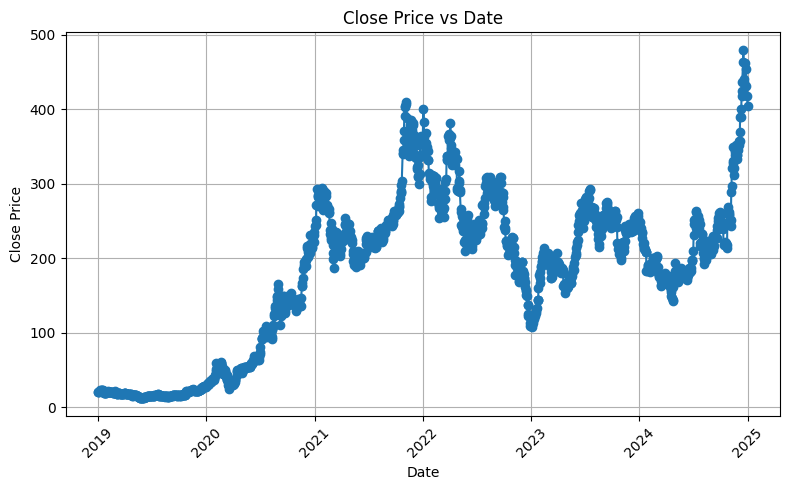

In [54]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.plot(data.index, data['close price'], marker='o')
plt.title('Close Price vs Date')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [52]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data.index, data['close price'], test_size=0.2, shuffle=False)
print("Training Dates:", X_train)
print("Testing Dates:", X_test)

Training Dates: DatetimeIndex(['2019-01-02', '2019-01-03', '2019-01-04', '2019-01-07',
               '2019-01-08', '2019-01-09', '2019-01-10', '2019-01-11',
               '2019-01-14', '2019-01-15',
               ...
               '2023-10-05', '2023-10-06', '2023-10-09', '2023-10-10',
               '2023-10-11', '2023-10-12', '2023-10-13', '2023-10-16',
               '2023-10-17', '2023-10-18'],
              dtype='datetime64[ns]', name='Date', length=1208, freq=None)
Testing Dates: DatetimeIndex(['2023-10-19', '2023-10-20', '2023-10-23', '2023-10-24',
               '2023-10-25', '2023-10-26', '2023-10-27', '2023-10-30',
               '2023-10-31', '2023-11-01',
               ...
               '2024-12-17', '2024-12-18', '2024-12-19', '2024-12-20',
               '2024-12-23', '2024-12-24', '2024-12-26', '2024-12-27',
               '2024-12-30', '2024-12-31'],
              dtype='datetime64[ns]', name='Date', length=302, freq=None)


# LSTM

# facebook Prophet model

# XGBoost

# is ARIMA, SARIMA valid?